# **MNIST HomeWork Solution**

import relevant packages

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

Data

In [ ]:
mnist_dataset,mnist_info = tfds.load(name='mnist',with_info=True,as_supervised=True)
#with_info=true will provide a tuple containing info. aboutversion,features,#samples of datasets
# as_supervised=true will load the data set into two tuple structure[input,target]
mnist_train,mnist_test = mnist_dataset['train'],mnist_dataset['test']
# by default, TF has training and testing datasets, but no validation sets
# thus we must split it on our own
# so we have to define number of validation samples as a % of the train samples
num_validatiion_samples = 0.1*mnist_info.splits['train'].num_examples
# as a float may cause an error, we  cast this number to an integer
num_validatiion_samples = tf.cast(num_validatiion_samples,tf.int64)
# store the number of test samples in a dedicated variable
num_test_samples = mnist_info.splits['test'].num_examples
# we  cast this number to an integer
num_test_samples = tf.cast(num_test_samples,tf.int64)

# normally, we would like to scale our data in some way to make the result more numerically stable
# in this case we will simply prefer to have inputs between 0 and 1
# let's define a function called: scale, that will take an MNIST image and its label
def scale(image,label):
  # we make sure the value is a float
  image = tf.cast(image,tf.float32)
  # since the possible values for the inputs are 0 to 255 (256 different shades of grey)
  # if we divide each element by 255, we would get the desired result -> all elements will be between 0 and 1
  image/=255.
  return image,label
# the method .map() allows us to apply a custom transformation to a given dataset
# we have already decided that we will get the validation data from mnist_train, so
scaled_train_validation_data = mnist_train.map(scale) 

# we scale and batch the test data
# we scale it so it has the same magnitude as the train and validation
# there would be a single batch, equal to the size of the test data

test_data = mnist_test.map(scale)
# shuffle the data
buffer_size = 10000
suffled_train_and_validation_data = scaled_train_validation_data.shuffle(buffer_size)
validation_data = suffled_train_and_validation_data.take(num_validatiion_samples)
train_data = suffled_train_and_validation_data.skip(num_validatiion_samples)
# determine the batch size
batch_size = 100
train_data = train_data.batch(batch_size)
# batch the test data
validation_data = validation_data.batch(num_validatiion_samples)
# takes next batch (it is the only batch)
# because as_supervized=True, we've got a 2-tuple structure
validation_input, validation_targets = next(iter(validation_data))

#   MODEL


input_size = 784
output_size = 10
hidden_layer_size = 100
# the first layer (the input layer)
# each observation is 28x28x1 pixels.
# there is a convenient method 'Flatten' that simply takes our 28x28x1 tensor and orders it into a (None,) 
# or (28x28x1,) = (784,) vector
# this allows us to actually create a feed forward neural network
model = tf.keras.models.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),# input layer
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),# 1st hidden layer
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),# 2nd hidden layer
                            tf.keras.layers.Dense(output_size, activation='softmax') # output layer


])
# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
# determine the maximum number of epochs
num_epochs = 5
# we fit the model, specifying the
# training data
# the total number of epochs
# and the validation data we just created ourselves in the format: (inputs,targets)
model.fit(train_data,epochs=num_epochs,validation_data=(validation_input,validation_targets),verbose=2)

Epoch 1/5
540/540 - 7s - loss: 0.3315 - accuracy: 0.9059 - val_loss: 0.1572 - val_accuracy: 0.9555 - 7s/epoch - 13ms/step
Epoch 2/5
540/540 - 5s - loss: 0.1336 - accuracy: 0.9608 - val_loss: 0.1093 - val_accuracy: 0.9673 - 5s/epoch - 9ms/step
Epoch 3/5
540/540 - 5s - loss: 0.0948 - accuracy: 0.9712 - val_loss: 0.0809 - val_accuracy: 0.9775 - 5s/epoch - 9ms/step
Epoch 4/5
540/540 - 5s - loss: 0.0734 - accuracy: 0.9774 - val_loss: 0.0646 - val_accuracy: 0.9808 - 5s/epoch - 9ms/step
Epoch 5/5
540/540 - 5s - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0596 - val_accuracy: 0.9823 - 5s/epoch - 9ms/step


In [ ]:
test_data = test_data.batch(num_test_samples)# batch the test_data



In [ ]:
model.evaluate(test_data) #evaluating the % of loss and accurecy 


1/1 [==============================] - 1s 882ms/step - loss: 0.0822 - accuracy: 0.9746


[0.08221754431724548, 0.9746000170707703]

In [ ]:
predicted = model.predict(test_data)
predicted_value = np.argmax(predicted, axis=1)

1/1 [==============================] - 0s 385ms/step


plotting our results

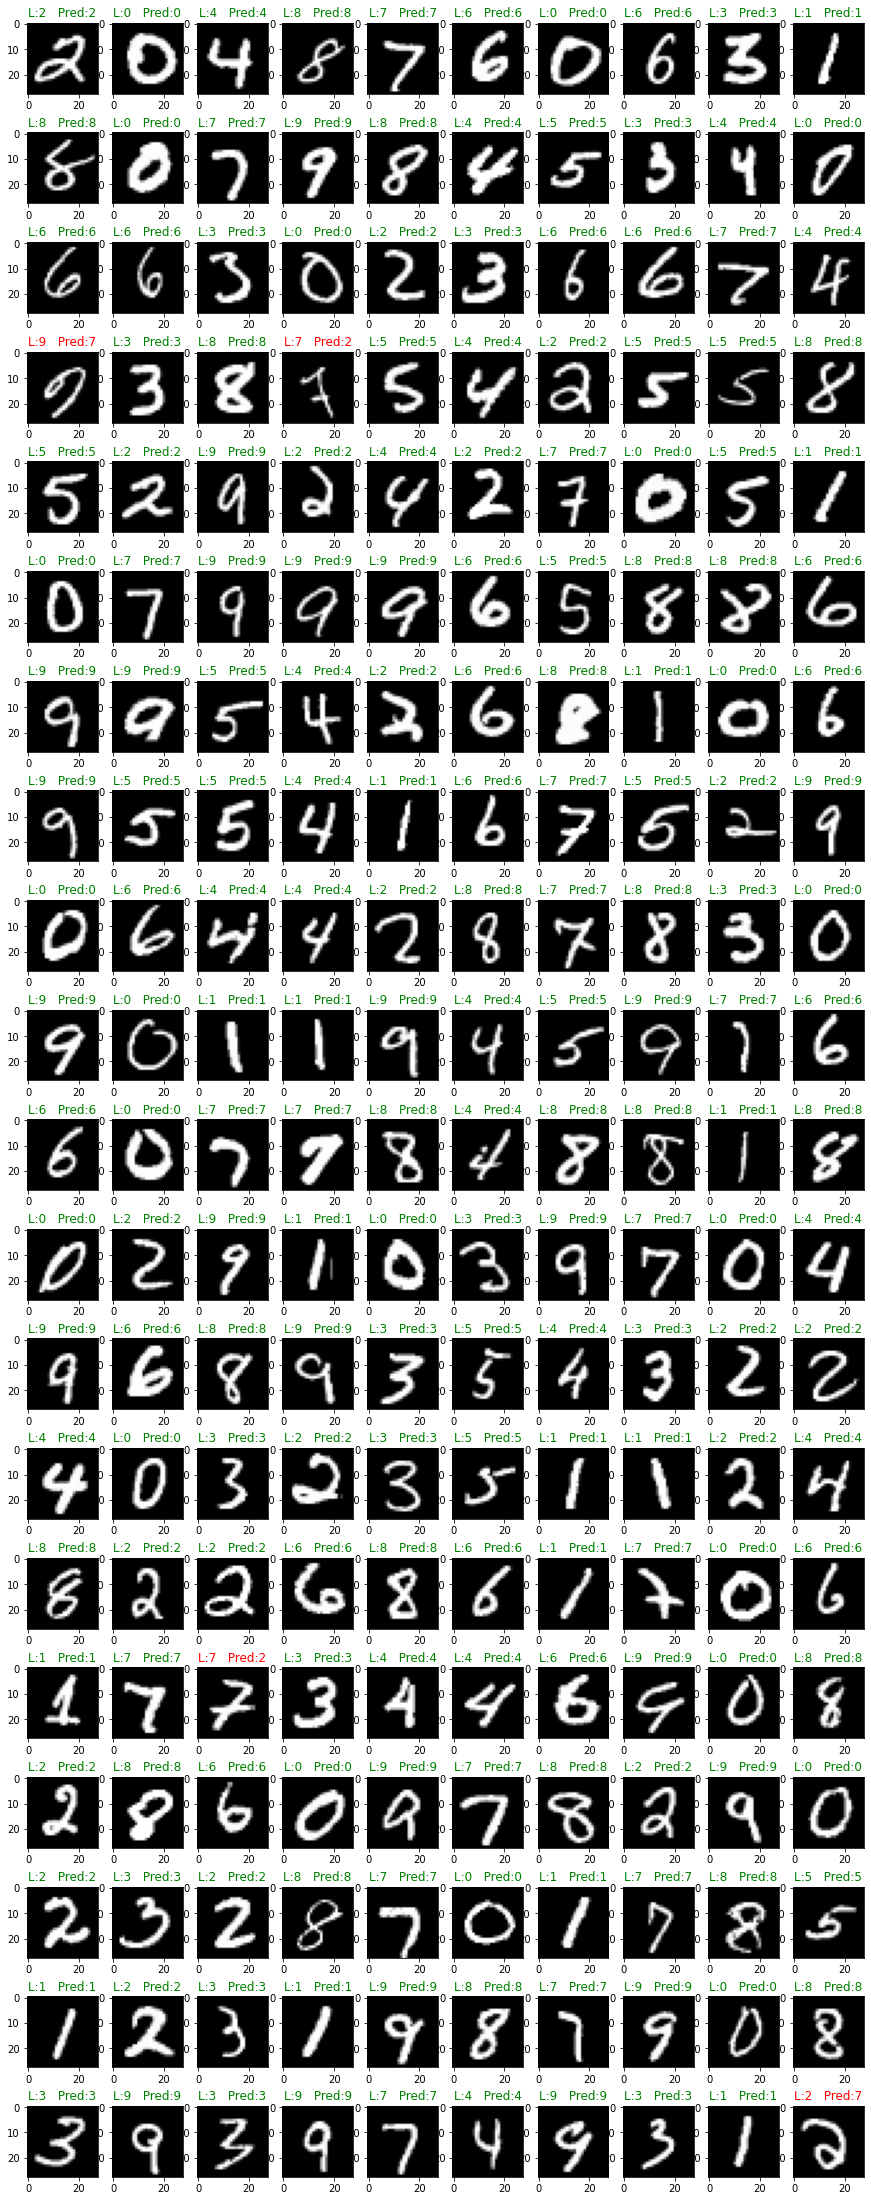

In [ ]:
# to access the mnist_test data we use __iter__() 
iterator = mnist_test.__iter__()
images=[]
# num of examples to plot.
num_of_examples = 200
i = 0
num_row = 20
num_col = int(num_of_examples / num_row)
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for mnist_example in iterator:
  if i < num_of_examples:
    # plot images
    ax = axes[i//num_col, i%num_col]
    image, label = mnist_example[0], mnist_example[1]
    ax.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap='gray')
    if predicted_value[i]== label.numpy():
      ax.set_title('L:{}   Pred:{}'.format(label.numpy(),predicted_value[i]), color = 'green')# 'L' for Label , 'Pred' for Predicted values 
    else:
      ax.set_title('L:{}   Pred:{}'.format(label.numpy(),predicted_value[i]), color = 'red')# 'L' for Label , 'Pred' for Predicted values 

    i+=1
      